In [1]:
from __future__ import print_function
import os
from io import BytesIO
import numpy as np
from functools import partial
import PIL.Image
import PIL
import tensorflow as tf
from IPython.display import Image, display

import timedream
from timedream import T, render_deepdream

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 1)*255)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [2]:
# Create a default session
sess = tf.InteractiveSession()

# Build model
graph, t_input, layers = timedream.load_inception_model()

for l in layers:
    print(l)

Number of layers 59
Total number of feature channels: 7548
conv2d0_pre_relu
conv2d1_pre_relu
conv2d2_pre_relu
mixed3a_1x1_pre_relu
mixed3a_3x3_bottleneck_pre_relu
mixed3a_3x3_pre_relu
mixed3a_5x5_bottleneck_pre_relu
mixed3a_5x5_pre_relu
mixed3a_pool_reduce_pre_relu
mixed3b_1x1_pre_relu
mixed3b_3x3_bottleneck_pre_relu
mixed3b_3x3_pre_relu
mixed3b_5x5_bottleneck_pre_relu
mixed3b_5x5_pre_relu
mixed3b_pool_reduce_pre_relu
mixed4a_1x1_pre_relu
mixed4a_3x3_bottleneck_pre_relu
mixed4a_3x3_pre_relu
mixed4a_5x5_bottleneck_pre_relu
mixed4a_5x5_pre_relu
mixed4a_pool_reduce_pre_relu
mixed4b_1x1_pre_relu
mixed4b_3x3_bottleneck_pre_relu
mixed4b_3x3_pre_relu
mixed4b_5x5_bottleneck_pre_relu
mixed4b_5x5_pre_relu
mixed4b_pool_reduce_pre_relu
mixed4c_1x1_pre_relu
mixed4c_3x3_bottleneck_pre_relu
mixed4c_3x3_pre_relu
mixed4c_5x5_bottleneck_pre_relu
mixed4c_5x5_pre_relu
mixed4c_pool_reduce_pre_relu
mixed4d_1x1_pre_relu
mixed4d_3x3_bottleneck_pre_relu
mixed4d_3x3_pre_relu
mixed4d_5x5_bottleneck_pre_relu
mixe

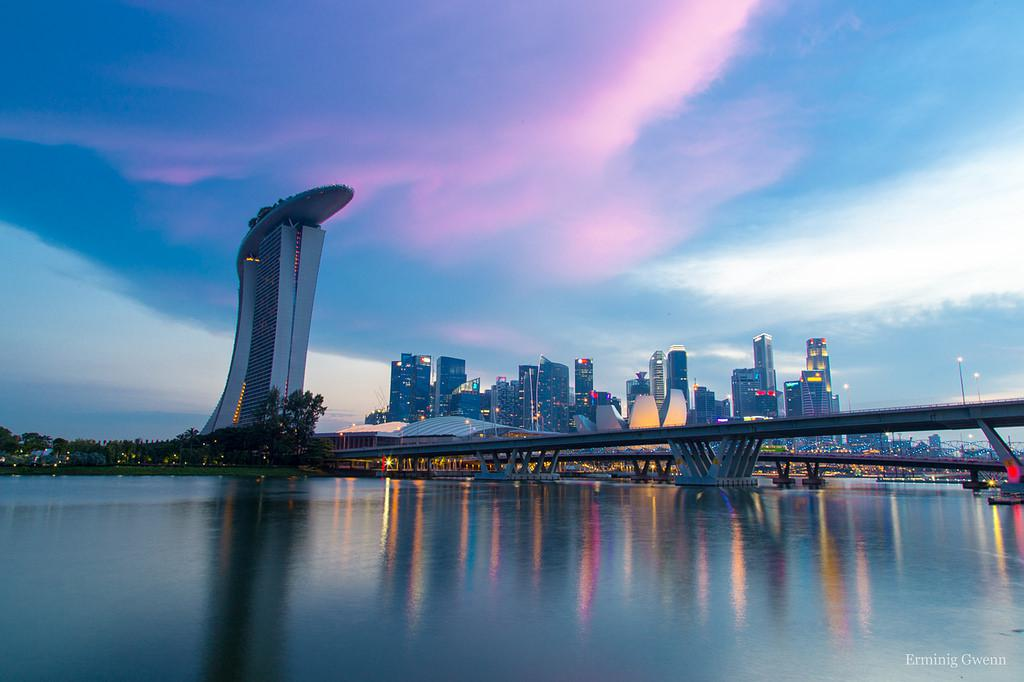

In [3]:
img = np.float32(PIL.Image.open('museum.jpg'))
showarray(img/255.0)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

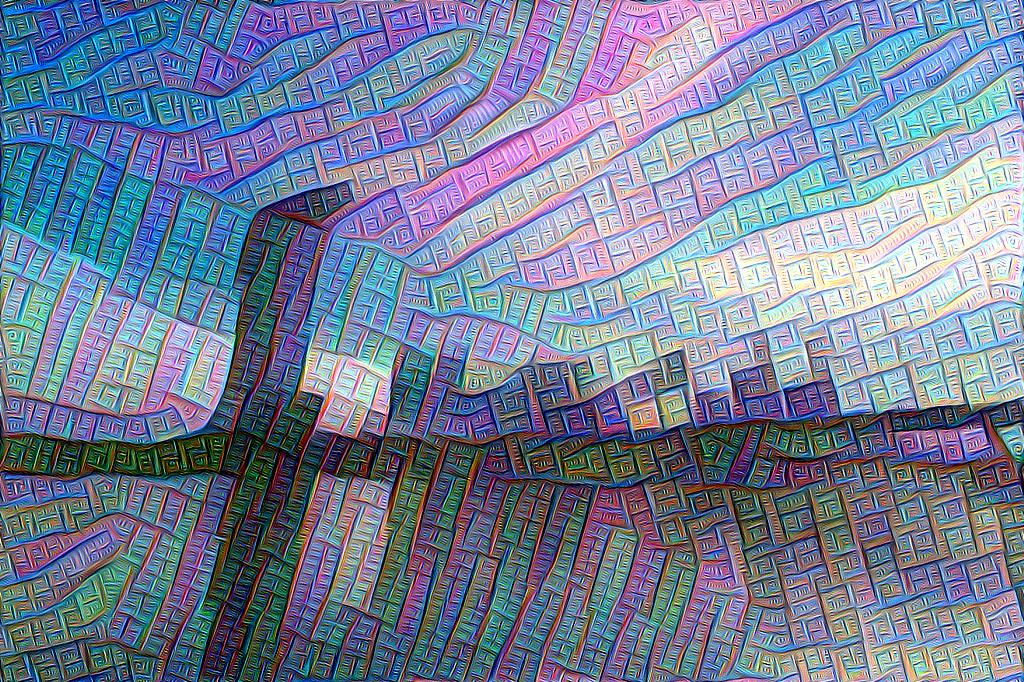

In [7]:
d_img = render_deepdream(tf.square(T('mixed3a_3x3_pre_relu')), t_input, img, iter_n=200)
showarray(d_img)